We want to compare in computational terms Tridiagonal matrixes and Sparse matrixes with the "\" solver and other solving algorithms

# 1.1 Functions and Pakages:
Now we go to comparing the two solver (\ and "LinearSolve pakage") with both sparse and tridiagonal matrix.
We starting by making a function for it : 

In [94]:
using SparseArrays
using Plots
using LinearSolve
using BenchmarkTools
using LinearAlgebra

function solver(Mat,b)
    if(size(Mat)[1]==size(Mat)[2])
        if(size(Mat)[1]!=size(b)[1])
            error("Wrong dimensions")
        end
        u = Mat \ b
        return u::Vector{Float64}
    else
        error("It's not a square matrix")
    end
end

function solv(Mat,b::Vector{Float64}) 
    if(size(Mat)[1]==size(Mat)[2])
        if(size(Mat)[1]!=size(b)[1])
            error("Wrong dimensions")
        end
        prob = LinearProblem(Mat, b)
        u = solve(prob, KrylovJL_CG())
        return u
    else
        error("It's not a square matrix")
    end
end


solv (generic function with 1 method)

# 1.2: Do the test with \ solver:
 In this first snippet of code we compared the "\" solver with a randomized 10000x10000 matrix with the 90% of zero-elements stored as a sparse one "A" and as a full one "B". We can see that in the first case it takes 5 times more time to find the u vector, and several more bytes of memory used. 

In [95]:
n = 1000;
density = 0.1;

f = rand(n);
A = sprand(n, n, density);
B = Matrix(A);

In [103]:
time_Sparse_SlashSolver = @elapsed begin
    ua_slash = solver(A,f)   
end


time_FullSparse_SlashSolver = @elapsed begin
    ub_slash = solver(B,f)   
end

display(ua_slash)
display(ub_slash)

1000-element Vector{Float64}:
 -4.143231408887588
  1.1268027970549608
  1.1254870941346642
  5.397712908979747
  4.381593444912522
 -2.175360498426149
  3.9518031297121667
  5.359000808624818
 -6.726884687464273
  4.4936423828263665
  ⋮
  3.382498292276704
 -1.6513523579977436
  7.371234869921624
  2.3045418279452257
 -4.287270298648985
 -5.67606625125714
  7.9707546066358175
  1.1393883366133282
  1.0855273149930793

1000-element Vector{Float64}:
 -4.143231408884272
  1.1268027970546899
  1.1254870941383868
  5.397712908976315
  4.381593444912012
 -2.175360498426401
  3.951803129714701
  5.3590008086294985
 -6.726884687473455
  4.493642382827929
  ⋮
  3.3824982922825004
 -1.6513523580006806
  7.371234869926051
  2.304541827947137
 -4.2872702986505224
 -5.676066251258281
  7.970754606629776
  1.1393883366143858
  1.085527314999706

# 1.3: With random matrix: 
In this second snippet of code we compared the "\" solver with a randomized 10000x10000 tridiagonal matrix stored as a sparse one "C" and as a full one "D". Now we see that storing the matrix as sparse led us to a way faster resolution of the problem using the base solver.

In [97]:
n=1000
f = rand(n);

#generating the low, high and main diagonal of a tridiagonal matrix
hd = rand(n-1);
ld = rand(n-1);
d = rand(n)

C = Tridiagonal(ld,d,hd);
D = Matrix(C);

In [98]:
time_Tridiagonal_SlashSolver = @elapsed begin
    uc_slash = solver(C,f)   
end

time_FullTridiagonal_SlashSolver = @elapsed begin
    ud_slash = solver(D,f)   
end

display(uc_slash)
display(ud_slash)

1000-element Vector{Float64}:
   0.6784815209174141
   0.5740398093337145
  -0.647990749097853
   1.8725483599692325
  -0.8166184824213384
   0.2894704853655331
   1.108357360536431
   0.26036158193785625
  -0.752627213100957
   0.8532912425905278
   ⋮
  -6.3578329087649665
  16.463139640198488
 -11.777650303112466
  -0.7974388797696387
   1.536773703576331
   2.206817129440095
  -0.5858757567036446
   1.8031919589808223
   0.18578236975377094

1000-element Vector{Float64}:
   0.6784815209174141
   0.5740398093337141
  -0.6479907490978527
   1.872548359969232
  -0.8166184824213386
   0.2894704853655331
   1.1083573605364314
   0.2603615819378561
  -0.7526272131009573
   0.8532912425905279
   ⋮
  -6.357832908764964
  16.46313964019849
 -11.777650303112472
  -0.7974388797696385
   1.536773703576331
   2.2068171294400947
  -0.585875756703644
   1.8031919589808223
   0.18578236975377094

So we can concluse that the best way to store the matrix is tridiagonal, in this way with the base solver we use less computational time.

# 2: Do the test with Linearsolver:
In order to be our comparasion more justified we do the tests with the Same matrix A,B,C and D :

# 2.2:  Sparse/Tridiagonal  Matrix:

In [99]:
time_Sparse_LinearSolver = @elapsed begin
    ua_linear = solv(A,f)   
end

time_FullSparse_LinearSolver = @elapsed begin
    ub_linear = solv(B,f)   
end

display(ua_linear)
display(ub_linear)

u: 1000-element Vector{Float64}:
 -1.2207444126774634e14
  1.631597164223598e14
  2.984691115984909e14
 -1.412374468269096e14
 -1.5752212582670706e14
  2.8161423159536494e14
 -4.037450382965178e13
  2.3454880886392325e14
  9.254982004541273e13
  2.306715417093814e14
  ⋮
 -2.570878550194196e14
  1.7043881975145116e14
  2.2812373689626984e14
  1.5710855644704275e14
 -2.171255130756582e14
 -2.4958943924396176e13
 -7.468702719008244e13
 -1.1869797265662962e14
 -2.6601683427491578e14

u: 1000-element Vector{Float64}:
 -1.2218858497357595e14
  1.6331227624150522e14
  2.987481902502673e14
 -1.413695085870959e14
 -1.5766941430911175e14
  2.8187755036781456e14
 -4.041225534782483e13
  2.3476811988412656e14
  9.263635723803492e13
  2.3088722735445294e14
  ⋮
 -2.573282408053139e14
  1.7059818577689866e14
  2.2833704025819612e14
  1.5725545822823247e14
 -2.1732853272858912e14
 -2.4982281375898316e13
 -7.475686207094202e13
 -1.1880895925087703e14
 -2.662655689565342e14

# 2.2:  Sparse/Tridiagonal  Matrix with random matrix:

In [100]:
time_Tridiagonal_LinearSolver = @elapsed begin
    uc_linear = solv(C,f)   
end

time_FullTridiagonal_LinearSolver = @elapsed begin
    ud_linear = solv(D,f)   
end

display(uc_linear)
display(ud_linear)

u: 1000-element Vector{Float64}:
    92.20980668115614
    36.69860713256023
  -101.36234904388247
  -188.3076156592995
    -4.461617408973297
   218.72353610974818
   -80.49392808713519
    54.98263555547406
    -5.092818123812092
    -1.0265462755853951
     ⋮
   482.1350396057563
   885.9900642436107
 -1306.465149854522
   663.5799295384666
  -823.0304673311206
  -475.68943158911674
   859.0137369338343
    62.60237207199109
   -14.01811105225643

u: 1000-element Vector{Float64}:
  -20.695333467910768
  127.71446592696846
    6.028355595816104
  319.1816358852043
 -788.5940138091984
  573.5773093613647
  -33.25730523297794
   96.15660902406378
   -3.706649415786482
  140.43348606283462
    ⋮
 -108.10531231185627
  249.10407763735404
 -240.45595803312833
  196.43469099902944
 -332.49052348946884
  -44.38117380514271
  256.70408485114945
  -91.78358532117865
 -158.47472557704964

In [101]:
time_titles= ["Sparse_SlashSolver","FullSparse_SlashSolver","Tridiagonal_SlashSolver","FullTridiagonal_SlashSolver","Sparse_LinearSolver","FullSparse_LinearSolver","Tridiagonal_LinearSolver","FullTridiagonal_LinearSolver"]
display(time_titles)
time =[time_Sparse_SlashSolver,time_FullSparse_SlashSolver,time_Tridiagonal_SlashSolver,time_FullTridiagonal_SlashSolver,time_Sparse_LinearSolver,time_FullSparse_LinearSolver,time_Tridiagonal_LinearSolver,time_FullTridiagonal_LinearSolver]

8-element Vector{String}:
 "Sparse_SlashSolver"
 "FullSparse_SlashSolver"
 "Tridiagonal_SlashSolver"
 "FullTridiagonal_SlashSolver"
 "Sparse_LinearSolver"
 "FullSparse_LinearSolver"
 "Tridiagonal_LinearSolver"
 "FullTridiagonal_LinearSolver"

8-element Vector{Float64}:
 0.136466
 0.0421413
 0.0059728
 0.0300022
 0.0107611
 0.0196741
 0.0111696
 0.2246365

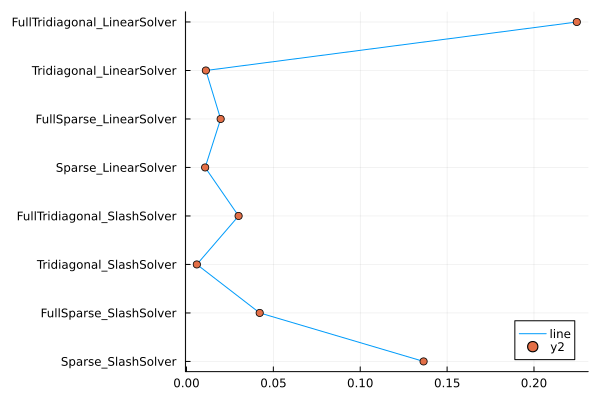

In [102]:
plot(time,time_titles,label="line")
scatter!(time,time_titles)